## **Feedback System**
---

>## Cascade Control Architecture
<p align="center">
    <img src="..\Pic\cascade_architecture.png" width="50%">
</p>

- **Transfer functions**
$$
\frac{Y(s)}{R(s)} = \frac{C(s)P(s)}{1 + C(s)P(s)}\\
{}\\
\frac{E(s)}{R(s)} = \frac{1}{1 + C(s)P(s)}\\
{}\\
\frac{U(s)}{R(s)} = \frac{C(s)}{1 + C(s)P(s)}
$$
- **Scenario**: determine steadt-state error & time-domain expressions for e(t)
$$
\begin{aligned}
C_1(s) = 10 \quad &\text{and} \quad P_1(s) = \frac{4}{s + 4} \\
C_2(s) = 10 \quad &\text{and} \quad P_2(s) = \frac{4}{s(s + 4)}\\
C_3(s) = 10 + 2s \quad &\text{and} \quad P_3(s) = \frac{1}{s(s - 4)}
\end{aligned}
$$
- **Result to compare**
$$
\begin{aligned}
e_1(t) = \frac{1}{11} u_{\text{stp}}(t) + \frac{10}{11} e^{-4t} u_{\text{stp}}(t) &==> \lim_{t \to \infty} e_1(t) = \frac{1}{11}\\
e_2(t) = \frac{1}{3} e^{-2t} \sin(6t) u_{\text{stp}}(t) + e^{-2t} \cos(6t) u_{\text{stp}}(t) &==> \lim_{t \to \infty} e_2(t) = 0\\
e_3(t) = e^t \cos(3t) u_{\text{stp}}(t) - e^t \sin(3t) u_{\text{stp}}(t) &==> \lim_{t \to \infty} e_3(t) \text{ is undefined}
\end{aligned}
$$

- **Key Takeaways**
    - Specify forward path transfer function: `C = tf([...],[...])` (Same for P, ... is the coefficient of $s_i$ term)
    - Build closed-loop: `sys = feedback(C*P, 1)`
    - Time span and trakectory: `t= 0:0.01:1.0`, `y, t = step(sys, t); y=y'`
    - Error and Reference: `Ref = ustep.(t)`, `Error = Ref - y`

In [4]:
using ControlSystems, Plots, LaTeXStrings
include("src\\special_function.jl")

tri (generic function with 1 method)

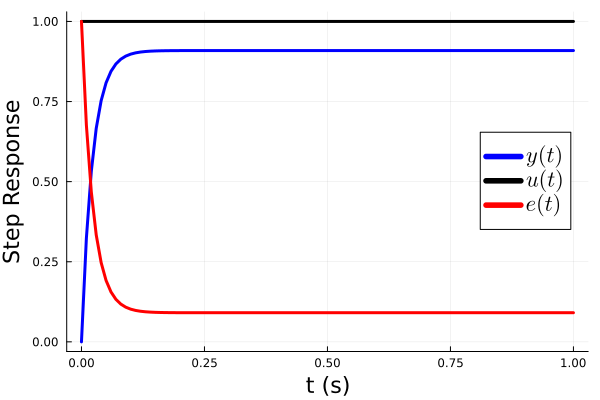

Pole: -44, so the system is BIBO stable
Error: 9.09%


In [11]:
# Specify forward path transfer function
C = 10.0
P = tf([4], [1.0, 4.0])

# Build closed-loop tf 
sys = feedback(C*P, 1)

# Compute and Plot the Step Response
t= 0:0.01:1.0

# Time trakectory
y, t = step(sys, t); y=y'

# Plot
p1 = plot(t, y, guidefont = 15, lw=3, color=:blue,  label=L"$y(t)$", legendfontsize=15, 
    xlabel="t (s)", ylabel="Step Response", legend=:right)
Ref = ustep.(t)
Error = Ref - y
p1 = plot!(p1, t, Ref, lw=3, color=:black, legend=:right, label=L"$u(t)$" )
p1 = plot!(p1, t, Error, lw=3, color=:red, legend=:right, label=L"$e(t)$" )
display(p1)
println("Pole: -44, so the system is BIBO stable")
println("Error: ", round(100*4/(4+40), digits=2), "%")

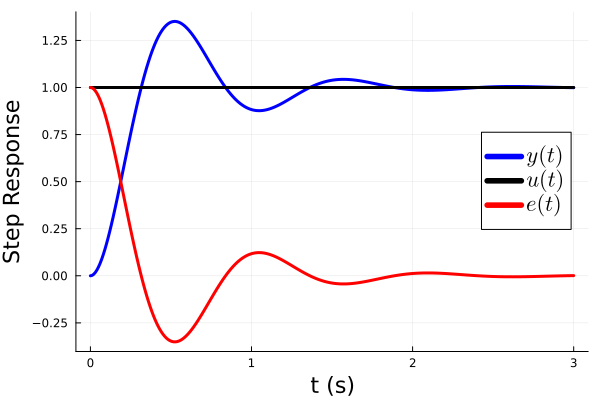

s(s+4) + 40 = s^2+4s+40=0, 4 & 40>0 ==> so the system is BIBO stable
Error: 0.0%


In [12]:
# Specify forward path transfer functions
C = 10.0
P = tf([4], [1.0, 4.0, 0.0]) 

# build closed-loop tf
sys = feedback(C*P, 1)

# Compute and Plot the Step Response
t = 0:0.01:3.0

# Time trakectory
y, t = step(sys, t); y = y'

# Plot
p1 = plot(t, y, guidefont = 15, lw=3, color=:blue,  label=L"$y(t)$", legendfontsize=15, 
    xlabel="t (s)", ylabel="Step Response", legend=:right)
Ref = ustep.(t)
Error = Ref - y
p1 = plot!(p1, t, Ref, lw=3, color=:black, legend=:right, label=L"$u(t)$" )
p1 = plot!(p1, t, Error, lw=3, color=:red, legend=:right, label=L"$e(t)$" )
display(p1)
println("s(s+4) + 40 = s^2+4s+40=0, 4 & 40>0 ==> so the system is BIBO stable")
println("Error: ", round(0/(0+40), digits=2), "%")

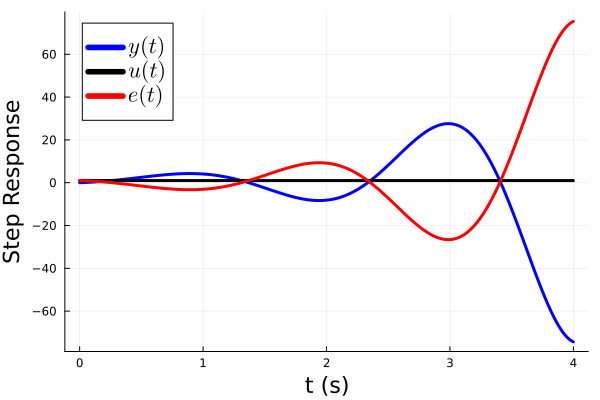

s(s-4) + (10+2s) = s^2-2s+10=0, -2<0 ==> so the system is not BIBO stable
Error: undefined


In [13]:
# Specify forward path transfer functions
C = tf([2, 10], [1.0])          # C(s) = (2s + 10)/1
P = tf([1], [1.0, -4.0, 0.0])   # P(s) = 1/(s^2 - 4s)

# build closed-loop tf
sys = feedback(C*P, 1)

# Compute and Plot the Step Response
t = 0:0.01:4.0

# Time trakectory
y, t = step(sys, t); y = y'

# Plot
p1 = plot(t, y, guidefont = 15, lw=3, color=:blue,  label=L"$y(t)$", legendfontsize=15, 
    xlabel="t (s)", ylabel="Step Response", legend=:topleft)
Ref = ustep.(t)
Error = Ref - y
p1 = plot!(p1, t, Ref, lw=3, color=:black, legend=:topleft, label=L"$u(t)$" )
p1 = plot!(p1, t, Error, lw=3, color=:red, legend=:topleft, label=L"$e(t)$" )
display(p1)
println("s(s-4) + (10+2s) = s^2-2s+10=0, -2<0 ==> so the system is not BIBO stable")
println("Error: undefined")

In [ ]:
#============================================ Optional for time-domain expressions for e(t) ==================================================#
using PyCall

# Import Python's SymPy
sympy = pyimport("sympy")

# Define the symbols
s, t = sympy.symbols("s t")

Ustep = 1/s

# Define the expression E1(s)
C1 = 10 + 0*3
P1 = 4/(s+4)
E1 = (1/(1 + C1*P1))*Ustep

# Compute the inverse Laplace transform
e1 = sympy.inverse_laplace_transform(E1, s, t)

println("Part 1")
println(e1)
println(" ")

# Define the expression E2(s)
C2 = 10 + 0*3
P2 = 4/(s*(s+4))
E2 = (1/(1 + C2*P2))*Ustep

# Compute the inverse Laplace transform
e2 = sympy.inverse_laplace_transform(E2, s, t)

println("Part 2")
println(e2)
println(" ")

# Define the expression E3(s)
C3 = 10 + 2*s
P3 = 1/(s*(s-4))
E3 = (1/(1 + C3*P3))*Ustep

# Compute the inverse Laplace transform
e3 = sympy.inverse_laplace_transform(E3, s, t)

println("Part 3")
println(e3)
println(" ")
#========================================================================================================================#

Part 1
PyObject Heaviside(t)/11 + 10*exp(-44*t)*Heaviside(t)/11
 
Part 2
PyObject (exp(-2*t)*sin(6*t)/3 + exp(-2*t)*cos(6*t))*Heaviside(t)
 
Part 3
PyObject (-exp(t)*sin(3*t) + exp(t)*cos(3*t))*Heaviside(t)
 


>## Feedback Design for a Linearized Model of a Planar Segway Transporter
- **Transfer function**: body lean angle
$$
\frac{\theta(s)}{\tau(s)} := G_\theta(s) = \frac{-21.468}{s^2 - 50.937 }
$$
- **Special Formulas**: use PD compensator
$$
P(s) = \frac{k_0}{s^2 + a_1s + a_0} , \ \ C(s) = K_P + K_Ds = K_D \left( s + \frac{K_P}{K_D} \right)\\
{}\\
G_{cl}(s) = \frac{C(s)P(s)}{1+C(s)P(s)} = k_0 \cdot \frac{K_D \left( s + \frac{K_P}{K_D} \right)}{s^2 + (a_1 + K_D k_0)s + (a_0 + K_P k_0)} =\frac{\omega_n^2}{s^2 + 2\zeta \omega_n s + \omega_n^2}
$$

- **Find the variables**
$$
K_P= \frac{\omega_n^2 - a_0}{k_0}\\
{}\\
K_D= \frac{2 \zeta \omega_n - a_1}{k_0}
$$

- **5 percent Settling time**: $  \approx \frac{3}{\zeta \omega _n}$
$$
e_{SS} =\frac{D(0)}{D(0) + N(0)} = \frac{a_0}{a_0 + k_0 \, K_P}
$$

- **Goal**: 5% overshoot, 5 percent Settling time = 0.7s

In [22]:
#============================================ DESIGN FOCUSING ON 5% OVERSHOOT AND 5% SETTING TIME ==================================================#
# P1 = k0/(s^2 + a1s + a0)
k0 = -21.468
a1 = 0
a0 = -50.937

# Set time domain specs for the closed-loop system
zeta = 0.7 # 5 % overshoot
Ts = 0.7

# Ts = 3.0/(zeta*wn)
wn = 3.0/(zeta*Ts)

# PD gains
Kp= (wn^2 - a0)/k0
println("Kp: ", Kp)
Kd= (2*zeta*wn - a1)/k0
println("Kd: ", Kd)

# Zero location for PD controller
z = Kp/Kd

# Steady-state error
eSS = a0 /(a0 + Kp*k0)
println("Steady-state error: ", round(100*eSS, digits=2), "%")

Kp: -4.118752632183022
Kd: -0.3992653517527749
Steady-state error: -135.89%


In [24]:
#============================================ DESIGN FOCUSING ON 5% OVERSHOOT AND eSS ==================================================#
# P1 = k0/(s^2 + a1s + a0)
k0 = -21.468
a1 = 0
a0 = -50.937

# Specifications
zeta = 0.7 # 5% overshoot
eSS = -0.20 

# Proportional Gain
Kp = (a0 - a0*eSS)/(k0*eSS)
println("Kp: ", Kp)

# Undamped natural frequency
# becomes complex with  eSS = +0.20
wn = sqrt(Kp*k0 + a0)

# Derivative gain
Kd= (2*zeta*wn - a1)/k0 
println("Kd: ", Kd)

# Zero location for PD controller
# Kd*(s+z)
z = Kp/Kd

# Settling time
Ts = 3/(zeta*wn)
println("Settling time: ", round(Ts, digits=2), " s")

# Steady state error to double check
# N(s)/D(S) = C(s)*P(s) 
#           = (Kp + Kds)* k0/(s^2 + a1s + a0)
#
# eSS = D(0) / (D(0) + N(0))
eSS = a0 /(a0 + Kp*k0)

Kp: -14.236165455561764
Kd: -1.0407301415676533
Settling time: 0.27 s


-0.20000000000000004

>## Pre-Compensator 

- **Lean Angle and Torque**
<p align="center">
    <img src="..\Pic\precompensator.png" width="50%">
<p\>


$$
\frac{Y(s)}{R(s)} = F(s) \cdot \frac{C(s)P(s)}{1 + C(s)P(s)}\\
{}\\
\text{Adjust for filtered error: } F(s) = K_f \ , \ \ F(0) = \frac{1+C(0)P(0)}{C(0)P(0)} \ , \ \ C(0) = K_P \ , \ \ P(0) = \frac{k_0}{a_0} \\
{}\\
\text{Cancel zero: } F(s) = \frac{z}{z+s} = \frac{1}{\frac{s}{z}+1}\ , \ \ z = \frac{K_P}{K_D}
$$

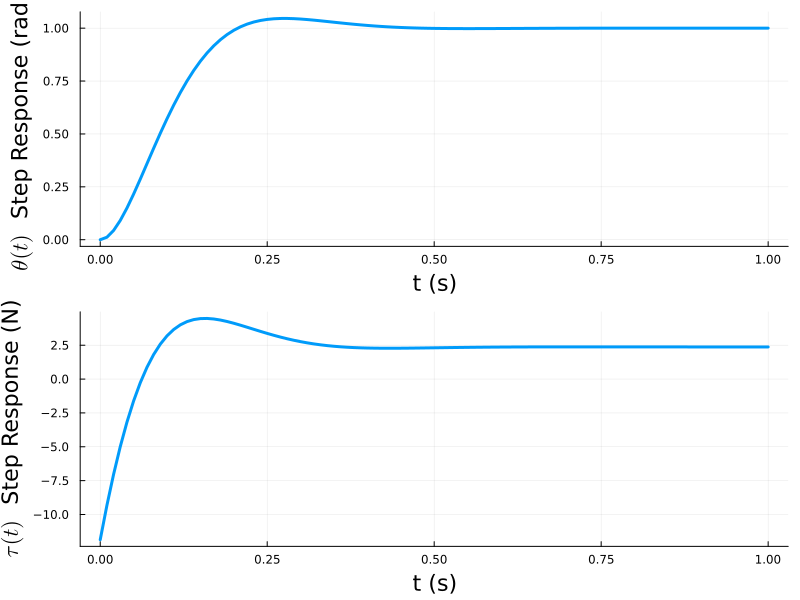

In [ ]:
# Continue with previous settings, run previous code block
# Pre-compensator DC gain
kF = (1 + Kp*k0/a0)/(Kp*k0/a0)

# Define Plant, Controller, and Precompensator Trasfer Functions
P = tf([k0], [1.0, a1, a0])
C = tf([Kd, Kp], [1.0])
F = tf([kF], [1/z, 1.0])

# Combine the transfer functions
G = C*P

# Create a Unity Feedback Loop
Cl = feedback(G, 1.0) 

# Multiply by the precompensator
sys = F*Cl

# Compute and Plot the Step Response
t = 0:0.01:1  # Time vector
y, t = step(sys, t)
p1 = plot(t, y', lw=3, label=false, guidefont = 15,
    xlabel="t (s)", ylabel=L"$\theta(t)$  Step Response (rad.)")
    
tfU = F*C/(1+C*P)
# Compute and Plot the Step Response
t = 0:0.01:1  # Time vector
u, t = step(tfU, t)

p2 = plot(t, u', lw=3, label=false, guidefont = 15,
    xlabel="t (s)", ylabel=L"$\tau(t)$  Step Response (N)")

plot(p1, p2, layout=(2,1), size=(800, 600))

>## Stabilizing the Speed

<p align="center">
    <img src="..\Pic\angle_speed.png" width="50%">
    <img src="..\Pic\controlling_speed_segway.png" width="50%">
<p\>

- **Transfer function from $\theta(s)$ to $V(s)$**
$$
V(s) = \left( 0.934 \cdot \frac{s^2 - 7.407}{s} \right) \theta(s)\\
{}\\
V(s) = \left( 0.934 \cdot \frac{(s - 2.722)(s + 2.722)}{s} \right) \left( \frac{254.685}{s^2 + 22.342s + 254.685} \right) \theta^{\text{des}}(s)
$$

<p align="center">
    <img src="..\Pic\second_compensator.png" width="50%">
    <img src="..\Pic\second_compensator_2.png" width="50%">
<p\>

$$
C_2(s) = K \frac{2.722}{s+2.722}
$$

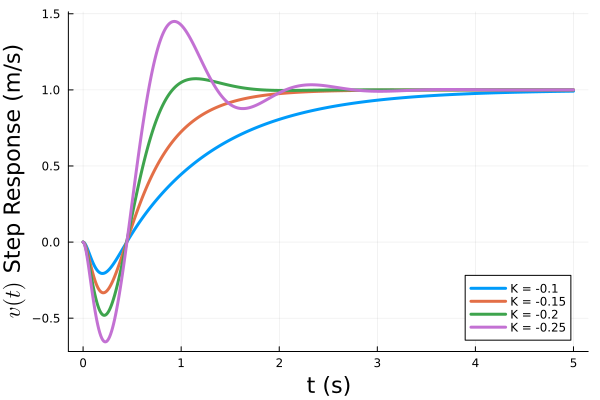

In [ ]:
# Controlling the Speed !!!
# Plant transfer function for the inner feedback loop
# from theta desired to theta
Pa = tf([254.685], [1, 22.342, 254.685]) 

# remaining part of the Segway's transfer fuction from torque to speed
Pb = tf([0.934, 0, -0.934*7.407], [1.0, 0])

# design transfer function for the outer feedbck loop
P2 = Pa*Pb # Final Plant TF

# Search over gains to find a good one
# remainder of the controller is inside the for loop
K = -0.1*[1, 1.5, 2, 2.5] 

# Create empty plot that we can add to in the loop
p1 = plot(guidefont = 15)

# For loop to compute multiple step responses
for i = 1:length(K)

    # Compensator depending on K
    # It cancels a stable zero
    C2 = tf([K[i]*2.722], [1, 2.722])
    G2 = C2*P2

    # Outer Unity feedback loop
    sys2 = feedback(G2, 1)

    # Compute and Plot the Step Response
    t = 0:0.01:5.0

    # Time vector
    v, t = step(sys2, t)

    # Create a LaTeX string for the legend
    K_label = string("K = ", round(K[i],digits=2)) 

    # Add to plot
    p1 = plot!(p1, t, v', lw=3, label=K_label)

end


# Make the plot
p1 = plot!(p1, xlabel="t (s)", ylabel=L"$v(t)$ Step Response (m/s)")